In [1]:
import os
import sys
import json
import pandas as pd
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
TOP_PATH = os.environ['PWD']

In [4]:
sys.path.append(TOP_PATH + '/config')
sys.path.append(TOP_PATH + '/src')

In [5]:
from trends import *
import etl
from regression import get_data_from_range
import eda_viz

In [6]:
df_2017_raw = pd.read_csv(TOP_PATH + '/data/raw/STOPS_2017.csv')

In [7]:
df_2017_raw.head()

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
0,1444799,Moving Violation,120,I,M,37,2017-01-01,00:03:00,N,N,NaN,NaN,NaN
1,1444821,Equipment Violation,520,W,M,22,2017-01-01,00:25:00,N,N,NaN,NaN,NaN
2,1447102,Moving Violation,520,W,M,29,2017-01-01,01:45:00,N,N,NaN,NaN,NaN
3,1444801,Equipment Violation,720,H,F,61,2017-01-01,03:10:00,N,N,NaN,NaN,NaN
4,1444802,Equipment Violation,120,H,M,24,2017-01-01,03:30:00,N,N,NaN,NaN,NaN


In [8]:
df_2017_cleaned = pd.read_csv(TOP_PATH + '/data/cleaned/2017_cleaned.csv')

# Make the dataframe that we'd be using to look at DACA

In [9]:
df_daca_window = get_data_from_range(('07-05-2017', '11-05-2017'))

In [10]:
df_daca_window.head()

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
56076,1500296,Equipment Violation,720,Black/African American,Male,30.0,2017-07-05,00:10:00,N,N,NaN,N,N
56077,1500297,Moving Violation,240,Other,Male,33.0,2017-07-05,00:19:00,N,N,NaN,N,N
56078,1500346,Equipment Violation,430,White,Male,31.0,2017-07-05,00:40:00,N,N,NaN,N,N
56079,1500347,Equipment Violation,820,Black/African American,Male,47.0,2017-07-05,00:49:00,Y,N,NaN,N,N
56080,1500299,Moving Violation,930,White,Female,40.0,2017-07-05,00:57:00,N,N,NaN,N,N


In [11]:
df_daca_used_columns = df_daca_window[['stop_id', 'service_area', 'subject_race', 'date_stop']]

In [12]:
df_daca_used_columns['month'] = df_daca_used_columns['date_stop'].str.slice(5,7)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
month_dictionary = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

In [14]:
df_daca_used_columns = df_daca_used_columns.astype({'month' : int})

In [15]:
month_distribution_df = (df_daca_used_columns[['month', 'stop_id']].groupby('month').count() / len(df_daca_used_columns)).rename({'stop_id' : 'stop_percentage'}, axis = 1)

In [16]:
month_distribution_df = month_distribution_df.sort_values('month')

In [17]:
month_distribution_df.index = month_distribution_df.index.map(month_dictionary)

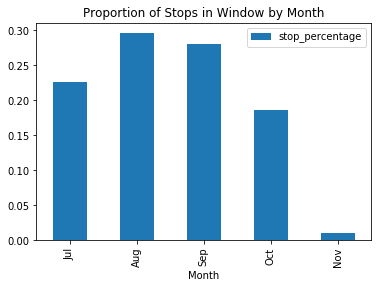

In [18]:
ax = month_distribution_df.plot(kind = 'bar')
ax.set(title = 'Proportion of Stops in Window by Month',
           xlabel = 'Month')
fig = ax.figure

In [19]:
fig?

In [20]:
temp2 = df_daca_used_columns.pivot_table(values = 'stop_id', index = 'month', columns = 'subject_race', aggfunc = 'count')

In [21]:
temp2.index = temp2.index.map(month_dictionary)

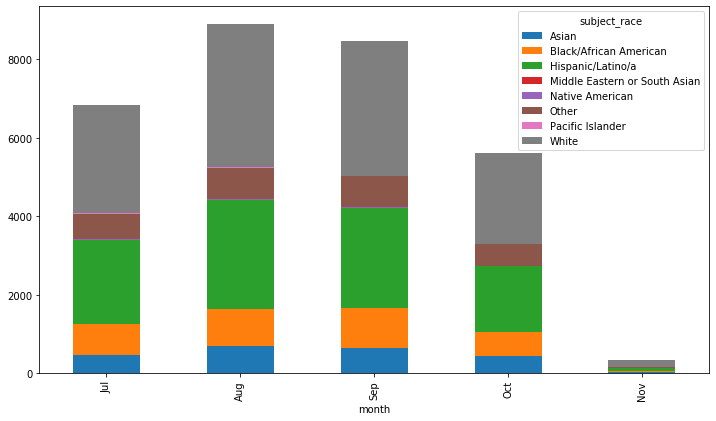

In [22]:
ax2 = (temp2.plot.bar(stacked = True, figsize = [12, 6.75]))

In [23]:
fig = ax2.figure

In [24]:
fig.savefig()

TypeError: savefig() missing 1 required positional argument: 'fname'

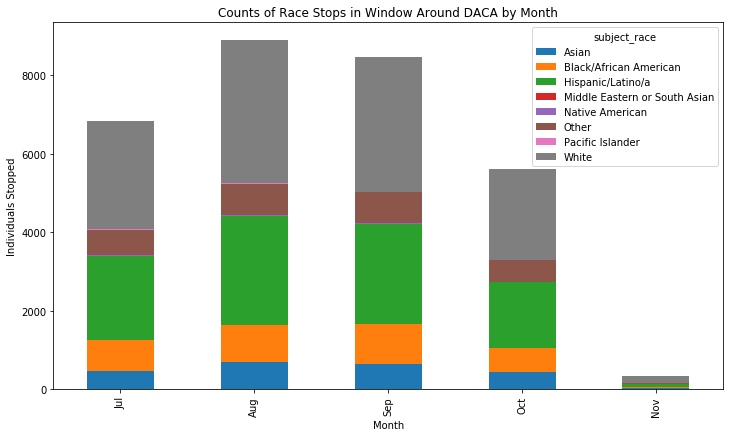

In [25]:
eda_viz.month_race_count_viz(('07-05-2017', '11-05-2017'), 'DACA', save_fig = True)

Length of window is 8682


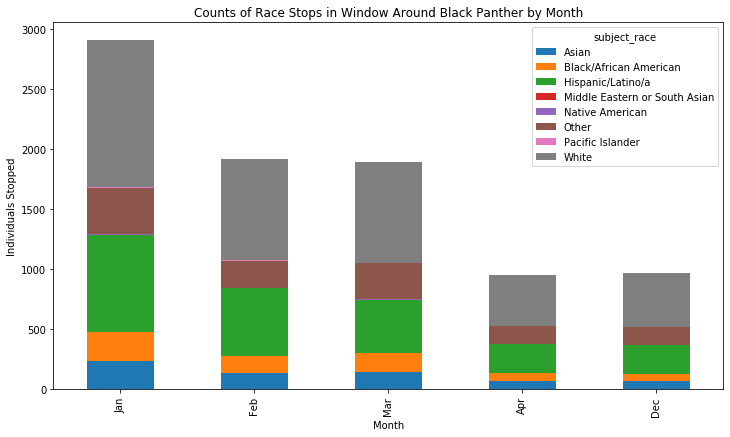

In [30]:
eda_viz.month_race_count_viz(('12-16-2017', '04-16-2018'), 'Black Panther')

Length of window is 36759


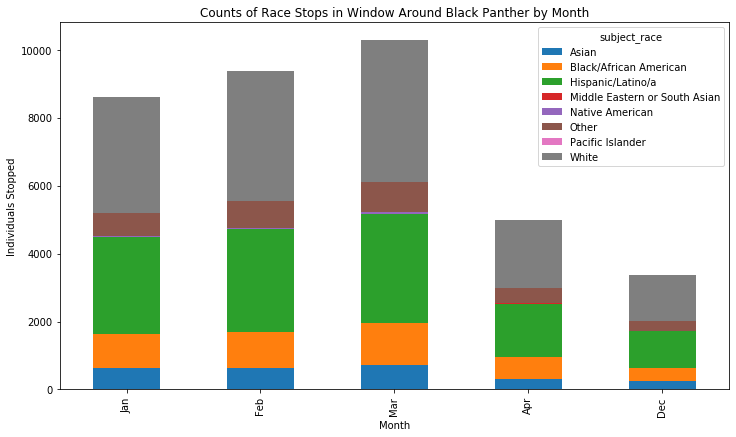

In [29]:
eda_viz.month_race_count_viz(('12-16-2016', '04-16-2017'), 'Black Panther')

In [ ]:
temp2 = df_daca_used_columns.pivot_table(values = 'stop_id', index = 'month', columns = 'subject_race', aggfunc = 'count')

In [ ]:
temp2.sort_values('month', ascending = False)

In [ ]:
temp2.index = temp2.index.map(month_dictionary)
temp2

In [75]:
df_2017 = pd.read_csv(TOP_PATH + '/data/raw/STOPS_2017.csv')

In [76]:
temp = df_2017[[pd.to_datetime(x) >= pd.to_datetime('12-16-2017') and pd.to_datetime(x) <= pd.to_datetime('04-16-2018') for x in df_2017['date_stop']]]

In [77]:
len(temp)

8682

In [78]:
df_2016 = pd.read_csv(TOP_PATH + '/data/raw/STOPS_2016.csv')

In [82]:
len(df_2017) / 18

5742.333333333333

In [91]:
df_2017['month'] = df_2017.date_stop.str.slice(5,7)
df_2017['year'] = df_2017.date_stop.str.slice(0,4)

In [92]:
df_2017[['stop_id', 'month', 'year']].groupby(['year', 'month']).count()

stop_id
year month         
2017 01        8638
     02        9397
     03       10327
     04        9076
     05        8659
     06        9051
     07        7761
     08        8928
     09        8479
     10        5618
     11        2503
     12        2439
2018 01        2922
     02        1929
     03        1900
     04        2040
     05        2111
     06        1584

In [93]:
df_2016['month'] = df_2016.date_stop.str.slice(5,7)
df_2016['year'] = df_2016.date_stop.str.slice(0,4)

In [94]:
df_2016[['stop_id', 'month', 'year']].groupby(['year', 'month']).count()

stop_id
year month         
2016 01        9202
     02       10060
     03        9370
     04        9046
     05        8953
     06        8798
     07        7665
     08        7843
     09        7677
     10        8486
     11        8328
     12        7623

In [95]:
df_2018_2019 = pd.read_csv(TOP_PATH + '/data/raw/STOPS_2018-2019.csv')

In [97]:
df_2018_2019['month'] = df_2018_2019.date_stop.str.slice(5,7)
df_2018_2019['year'] = df_2018_2019.date_stop.str.slice(0,4)

In [98]:
df_2018_2019[['stop_id', 'month', 'year']].groupby(['year', 'month']).count()

stop_id
year month         
2018 07       15522
     08       14898
     09       12453
     10       12871
     11       12204
     12       11977
2019 01       12755
     02       11225
     03       14359
     04       13931
     05       13975
     06       12587
     07       14112
     08       14683
     09       13694
     10       14847
     11       12876
     12       12321

In [83]:
len(df_2016) / 12

8587.583333333334

In [ ]:
t = 

In [70]:
temp

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
89900,1606060,Moving Violation,520,NaN,NaN,NaN,2017-12-17,00:01:00,N,N,NaN,N,N
89901,1606896,Moving Violation,120,Hispanic/Latino/a,Female,52.0,2017-12-17,03:25:00,N,N,NaN,N,N
89902,1606889,Moving Violation,120,White,Female,20.0,2017-12-17,08:20:00,N,N,NaN,N,N
89903,1606888,Moving Violation,120,White,Female,30.0,2017-12-17,08:32:00,N,N,NaN,N,N
89904,1606886,Moving Violation,120,White,Female,71.0,2017-12-17,08:45:00,N,N,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98577,1615285,Equipment Violation,810,Other,Female,19.0,2018-04-16,12:56:00,N,N,NaN,N,N
98578,1615283,Moving Violation,810,Other,Female,43.0,2018-04-16,13:10:00,N,N,NaN,N,N
98579,1615284,Moving Violation,810,Other,Female,46.0,2018-04-16,13:13:00,N,N,NaN,N,N
98580,1615291,Equipment Violation,810,Other,Male,32.0,2018-04-16,13:24:00,N,N,NaN,N,N


In [71]:
t

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
99489,1440927,Equipment Violation,510,Hispanic/Latino/a,Male,25.0,2016-12-16,0:20,N,N,NaN,N,N
99490,1440949,Equipment Violation,510,White,Female,32.0,2016-12-16,0:20,N,Y,NaN,N,N
99491,1440929,Equipment Violation,520,Black/African American,Male,36.0,2016-12-16,0:30,N,N,NaN,N,N
99492,1440951,Moving Violation,510,Black/African American,Male,56.0,2016-12-16,0:35,N,N,NaN,N,N
99493,1440952,Equipment Violation,510,Hispanic/Latino/a,Male,53.0,2016-12-16,0:45,N,N,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33357,1478076,Equipment Violation,110,White,Male,23.0,2017-04-16,23:20:00,N,N,NaN,N,N
33358,1478077,Equipment Violation,620,Black/African American,Female,55.0,2017-04-16,23:30:00,N,N,NaN,N,N
33359,1478080,Equipment Violation,440,White,Male,24.0,2017-04-16,23:46:00,N,N,NaN,N,N
33360,1478100,Equipment Violation,440,Hispanic/Latino/a,Male,47.0,2017-04-16,23:53:00,Y,Y,N,N,N


In [46]:
df_2016 = pd.read_csv(TOP_PATH + '/data/cleaned/2016_cleaned.csv')

In [47]:
comb = pd.concat([df_2016, df_2017])

In [50]:
t = comb[[pd.to_datetime(x) >= pd.to_datetime('12-16-2016') and pd.to_datetime(x) <= pd.to_datetime('04-16-2017') for x in comb['date_stop']]]

In [51]:
len(t)

36759

In [63]:
temp['date_stop'].unique()

array(['2017-12-17', '2017-12-18', '2017-12-19', '2017-12-20',
       '2017-12-21', '2017-12-22', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30',
       '2017-12-31', '2018-01-01', '2018-01-02', '2018-01-03',
       '2018-01-04', '2018-01-05', '2018-01-06', '2018-01-07',
       '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
       '2018-01-12', '2018-01-13', '2018-01-14', '2018-01-15',
       '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19',
       '2018-01-20', '2018-01-21', '2018-01-22', '2018-01-23',
       '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-27',
       '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
       '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
       '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
       '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13',
       '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17',
       '2018-02-18', '2018-02-19', '2018-02-20', '2018-

In [64]:
t['date_stop'].unique()

array(['2016-12-16', '2016-12-17', '2016-12-18', '2016-12-19',
       '2016-12-20', '2016-12-21', '2016-12-22', '2016-12-23',
       '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27',
       '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31',
       '2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
       '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
       '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
       '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
       '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
       '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01',
       '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
       '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
       '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
       '2017-02-14', '2017-02-15', '2017-02-16', '2017-

In [65]:
len(t)

36759

In [67]:
t.stop_id.nunique()

36759

In [68]:
len(df_2017)

103362

In [72]:
df_2018 = pd.read_csv(TOP_PATH + '/data/cleaned/2018-2019_cleaned.csv')

In [74]:
len(df_2016)

103051

In [101]:
df_2017[df_2017['stop_id'] == 69583]

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized,month,year
